<a href="https://colab.research.google.com/github/snowmaricano/Bigdata/blob/main/%5Bpandas_05%5D_Statistic_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0.라이브러리 준비
- numpy API : https://numpy.org/doc/stable/reference/
- pandas API : https://pandas.pydata.org/pandas-docs/stable/reference/index.html

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.통계 분석 개요
- 모집단(population): 연구 대상 데이터 전체 집합
- 모수(parameter) : 모집단의 특성을 나타내는 수치
- 표본(sample) : 모집단에서 추출한 일부 데이터
- 통계량(statistic) : 표본의 특성을 나타내는 수치

> 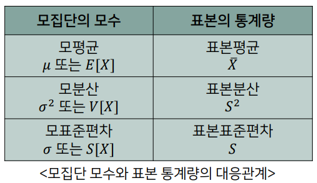


In [ ]:
# [1] 평균, 분산, 표준편차 구하기
# Delta Degrees of Freedom (ddof=1) : pandas - 표본

s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print('표본평균:', )
print('표본분산:', )
print('표본표준편차:', )
print('모분산:', )
print('모표준편차:', )

In [ ]:
# [2] numpy의 var()와 pandas의 var()가 다른 이유는?
# ddof=0, numpy - 모집단
s = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print('평균:', )
print('표본분산:', )
print('표본표준편차:', )
print('모분산:', )
print('모표준편차:', )

In [ ]:
https://pandas.pydata.org/docs/reference/api/pandas.Series.var.html
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.var.html

### 2.표본추출(Sampling)
- DataFrame.sample(n=None, frac=None ,...)
- https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.sample.html

In [ ]:
# [1] tips 데이터를 가져오기 한다
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
# [2] tips의 전체 데이터 개수 확인


(244, 7)

In [ ]:
# [2] 단순 무작위 추출 - 비율 사용
# 0.02(2%) 추출 : 244 * 0.02 = 4.88 -> 5개


In [ ]:
# [3] 단순 무작위 추출 - 정수 사용
# 5개 sample 추출


In [ ]:
# [4] 계통 추출 - 1부터 시작해 50 마다 1개 추출
# tips의 iloc을 사용해 특정 번호 list => [1, 51, 101, 151, 201] 로 indexing


In [ ]:
# [5] 층화 추출 - 성별을 기준으로 성별 비율에 맞춰 10개 데이터 추출
# [5-1] 성별 비율 구하기(rate), 추출할 sample 개수 구하기(sample_n)
sample_n = 10


In [ ]:
temp.loc['Male', 'sample_n']

6

In [ ]:
# [5-2] Female, Male로 데이터 분리 및 sample개수 만큼의 임의 표본 추출


### 3.이상치(Outlier)
- 일반적인 값들과 많이 떨어진 위치의 데이터
- 평균은 이상치에 영향을 크게 받지만, 중앙값은 영향을 거의 받지 않음

In [ ]:
# [1] 이상치와 평균, 중앙값의 관계
import pandas as pd
data1 = [10,20,30,40,50]
data2 = [10,20,30,40,200]
a = pd.Series(data1)
b = pd.Series(data2)
print('평균  ', a.mean(), b.mean())
print('중앙값', a.median(), b.median())

평균   30.0 60.0
중앙값 30.0 30.0


#### 3-01. 이상치 확인

In [ ]:
# [2] seaborn의 tips 데이터셋 가져오기
tips = sns.load_dataset("tips")

In [ ]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


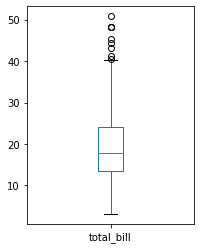

In [ ]:
# [3] tips의 'total_bill'의 이상치를 그래프로 확인하기
tips['total_bill'].plot.box(figsize=(3,4))
plt.show()

In [ ]:
#Series/DataFrame => x
#x.plot(kind='box')
#x.plot.box()

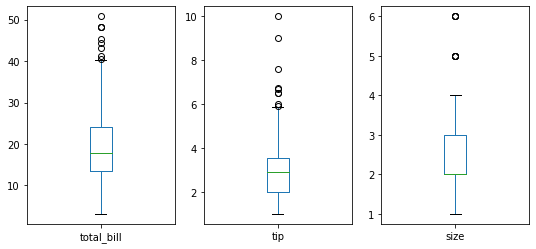

In [ ]:
# [4] DataFrame의 plot을 사용하여 연속형 데이터에 대해 모두 boxplot 그리기
tips.plot(kind='box', subplots=True, figsize=(9,4))
plt.show()

In [ ]:
# [5] ESD(Extream Studentized Diviate)를 이용한 방법
# 평균으로 부터 3 표준편차 떨어진 값을 이상치로 판단
# tip에 대한 이상치 구하기, 소수점 아래 2째자리까지 표기

print(f'Lower: {e_lower}, Upper: {e_upper}')

In [ ]:
# [6] 사분위수를 이용한 방법
# Q1 - 1.5*IQR 미만, Q3 + 1.5*IQR 초과 를 이상치로 판단 (IQR = Q3 - Q1)
# tip에 대한 이상치 구하기, 소수점 아래 2째자리까지 표기

print(f'Lower: {q_lower}, Upper: {q_upper}')

#### 3-02. 이상치 처리

In [ ]:
# [7] 이상치 제거 - 정상범주에 있는 데이터를 indexing 하는 방법으로 처리 (q_lower, q_upper 사이값이 정상)


print(tips.shape, tips2.shape)

In [ ]:
# [8] 이상치 데이터 모음


In [ ]:
# [9] 이상값 대체
# q_upper 보다 큰 데이터는 q_upper, q_lower 보다 작은 데이터는 q_lower로 변경
# tips3 데이터프레임에서 'tip' 값이 q_upper 보다 큰 것의 'tip'값을 q_upper 값으로 변경
# tips3 데이터프레임에서 'tip' 값이 q_lower 보다 작은 것의 'tip'값을 q_lower 값으로 변경
tips3 = tips.copy()
# code here


### 4.데이터 변환(Transform)
- 이상치를 완화하거나, 정규분포가 되도록 하기 위해 사용함
- numpy의 log1p, sqrt, expm1, power 등의 함수 사용
    - log1p, sqrt 는 큰 값을 작게 만들어 주며, 오른쪽 꼬리가 긴 분포를 정규분포로 변환하는데 사용, 큰 이상치를 작게 만들 수 있음
    - expm1, power는 작은 값을 크게 만들어 주며, 왼쪽 꼬리가 긴 분포를 정규분포로 변환하는데 사용함

In [ ]:
# [0] 데이터 가져오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

In [ ]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


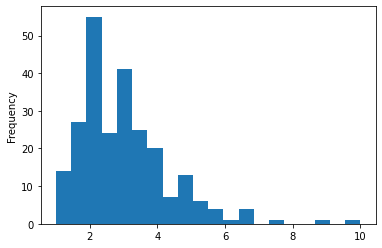

In [ ]:
# [1] tips에서 tip의 분포 확인
s = tips['tip']
s.plot.hist(bins=20)
plt.show()

In [ ]:
# [2] y = log(x) 이해 -> np.power(np.e, y) = x  (몇 번 곱)
# np.log10(100) => np.power(10, ?) = 100


In [ ]:
# [3] y = exp(x) 이해 -> y = power(np.e, x)


In [ ]:
# [4] log(0) -> x가 0인 경우 -inf 이기 때문에 x에 +1을 해서 동작하는 np.log1p를 사용함


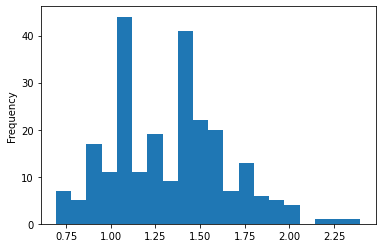

In [ ]:
# [5] tip의 분포를 오른쪽 꼬리가 긴 것에 대해서 짧게 만들기 (로그)
s =
s.plot.hist(bins=20)
plt.show()

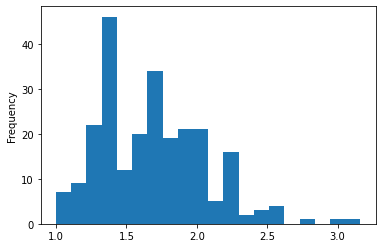

In [ ]:
# [6] tip의 분포를 오른쪽 꼬리가 긴 것에 대해서 짧게 만들기  (제곱근)
s =
s.plot.hist(bins=20)
plt.show()

In [ ]:
# [7] tips['tip'] 원본 -> log1p -> expm1 = 원본
a = tips['tip']

print(a[:3], b[:3], c[:3], sep='\n\n')

In [ ]:
# [8] tips['tip'] 원본 - sqrt - power = 원본
a = tips['tip']

print(a[:3], b[:3], c[:3], sep='\n\n')

### 5.데이터 스케일링(Scaling)
- min-max normalization : 값의 범위를 [0, 1]로 변환
   - (xi - x.min()) / (x.max() - x.min())
- standardization : 특성의 값이 정규분포를 갖도록 변환 (평균 0, 표준편차 1)
    - (xi - x.mean()) / x.std()

In [ ]:
# [1] Scaling을 위한 함수 구현
def minmaxScale(x):
    pass


def standardScale(x):
    pass

In [ ]:
# [2] minmaxScale 함수를 사용한 'tip' 컬럼의 스케일링
x =
print(x.min(), x.max())

In [ ]:
# [3] standardScale 함수를 사용한 'tip' 컬럼의 스케일링
x =
print(x.mean(), x.std())

In [ ]:
# [4] sklearn 라이브러리의 스케일러(MinMaxScaler)를 사용한 스케일링
# 스케일러의 fit_transform() 사용시 2차원의 데이터를 전달해야 함
# (DataFrame도 2차원), 결과는 ndarray로 반환 됨
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x =
print(x.min(), x.max())

In [ ]:
# [5] sklearn 라이브러리의 스케일러(StandardScaler)를 사용한 스케일링
from sklearn.preprocessing import StandardScaler
x =
print(x.mean(), x.std())

In [ ]:
# [6] scipy.stats의 zscore 함수를 사용한 스케일링
from scipy.stats import zscore
x =
print(x.mean(), x.std())

### 6.Encoding (범주형 - 수치형)
- Label Encoding : 값의 일련번호로 표기함
   - '여성', '남성', '아이' : 0, 1, 2
   - '월', '화', ... '일' : 0, 1, ...6
   - category 타입의 cat.codes
   - Series.replace()를 사용 함
- One Hot Encoding : 범주의 개수 만큼의 feature를 만들어냄
   
               LE  여자  남자  아이
        '여자'  0    1    0     0
        '남자'  1    0    1     0
        '여자'  0    1    0     0
        '남자'  1    0    1     0
        '아이'  2    0    0     1
        '남자'  1    0    1     0
        '아이'  2    0    0     1

   - pd.get_dummies(Series/DataFrame)        

In [ ]:
import pandas as pd
df = pd.DataFrame({'A':['월', '화', '수', '화', '수', '금', '월'],
                   'B':['여자', '남자', '여자', '남자', '아이', '남자', '아이']})
df

In [ ]:
# [1] 요일에 대해서 Label Encoding 합니다.  (cat.code 사용)


In [ ]:
# [2] '남자', '여자', '아이'에 대해서 Label Encoding 합니다 (replace 사용)


In [ ]:
# [3] df의 'A' 컬럼을 One Hot Encoding 합니다.
a =
a

In [ ]:
# [4] df의 'B' 컬럼을 One Hot Encoding 합니다.
b =
b

In [ ]:
# [5] df, a, b를 axis=1 방향으로 합치기 합니다.


In [ ]:
# [6] df의 모든 범주형 변수를 OneHotEncoding 합니다


### 7.Binning (수치형-범주형)
- 연속형 변수를 구간을 이용하여 범주화 하는 과정
- 정보가 압축되고 단순해짐 정확도는 떨어짐
- 이상치 해결 방법 중 한 가지로 사용하거나, 오버피팅(overfitting) 방지 기법으로 사용
- (3, 6]  :  3초과 6포함, right=True
- [3, 6)  :  3이상 6포함하지 않음, right=False
- pd.cut()

In [ ]:
import pandas as pd

In [ ]:
# [0] 데이터 준비
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df = pd.DataFrame(data, columns=['data'])
df['data'].to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# [1] data를 사용하여 0~3, 4~6, 7~10 에 대한 binning을 하여 보도록 한다
# 범주의 레이블은 ['A', 'B', 'C']를 사용한다

# (Min-1, 3], (3, 6], (6, Max] 로 범주를 만들어 result_A 컬럼으로 추가합니다.


# [Min, 3), [3, 6), [6, Max+1) 로 범주를 만들어 result_B 컬럼으로 추가합니다.


In [ ]:
# [2] result_A에 대해 LabelEncoding을 하여 result_C를 컬럼으로 추가합니다.


비율을 사용하여 구간 나누기
- pd.qcut(데이터, 구간)
- 구간은 0 ~ 1 사이의 숫자 사용

In [ ]:
# [3] 비율을 사용하여 구간나누기


In [ ]:
# [4] 다음 데이터를 binning 하여보세요 (bins 컬럼 추가)
# 사용구간 : [10, 40), [40, 50), [50, 60), [60, 70), [70, 80), [80, 101)
# 사용레이블 : '10-40미만', '40-50미만', '50-60미만', '60-70미만', '70-80미만', '80-100'
data = [55.6, 83.3, 43.4, 58.1, 31.6, 55.6, 60.7, 64.6,
        73.3, 55.6, 64.3, 52.8, 22.7, 46.3, 71.4, 53.8,
        64.5, 67.9, 71.4, 80.0, 59.5, 40.5, 77.1, 58.6,
        65.4, 52.4, 66.7, 91.3, 41.3, 72.1, 61.9, 78.4,
        63.6, 41.0, 65.2, 81.3, 54.8, 19.6, 50.0, 53.1,
        41.2, 56.5]
df = pd.DataFrame(data, columns=['data'])


In [ ]:
# [5] bins 컬럼에 대해 LabelEncoding을 하여 bin_n 컬럼을 추가합니다.



In [ ]:
# [6] 다음 나이 데이터를 binning 하여보세요
bin_labels = 'Baby Child Teenager Student Young_Adult Adult Elderly'.split()   # 7개 label
data = [42, 11, 40, 16, 35, 58, 1, 13, 22, 7, 62, 11, 52, 67, 42, 33, 15, 60, 36, 36]
df = pd.DataFrame(data, columns=['age'])

# (-1, 5], (5, 12], (12, 18], (18, 25], (25, 35], (35, 60], (60, df['age'].max()] 로
# 범주를 만들어 age_cat 컬럼으로 추가합니다.


### 8.상위 10%, 하위 10% 데이터 추출

In [ ]:
# [1] quantile 사용하여 상위 10%, 하위 10%의 위치값 알아내기 (p01, p09로 저장하기)
import pandas as pd
X = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df = pd.DataFrame(X, columns=['data'])


In [ ]:
# [2] p01 사용하여 하위 10%의 데이터 추출


In [ ]:
# [3] p09 사용하여 상위 10%의 데이터 추출


### 9.돗수분포표

In [ ]:
# [0] 문자열 리스트의 곱셈 이해
['A+'] * 3 + ['A'] * 6  # ['A+', 'A+', 'A+', 'A', 'A', 'A', 'A', 'A', 'A']

['A+', 'A+', 'A+', 'A', 'A', 'A', 'A', 'A', 'A']

In [ ]:
# [1] 데이터 생성하기
data = ['A+', 'A', 'B+', 'B', 'C+', 'C', 'D+', 'D', 'F']
cnt  = [3, 6, 12, 16, 10, 8, 4, 1, 2]
mylist = []
for s, c in zip(data, cnt):
    mylist.extend([s] * c)

df = pd.DataFrame(mylist, columns=['data'])
df = df.sample(frac=1)
print(df['data'].to_list())

['A', 'B+', 'C+', 'B', 'B', 'B+', 'B', 'B', 'F', 'B', 'B+', 'C', 'C', 'B', 'C', 'A', 'C', 'C+', 'B', 'B', 'B', 'B', 'C+', 'B+', 'D', 'B+', 'A+', 'A', 'A', 'D+', 'B+', 'B+', 'D+', 'A', 'C+', 'B+', 'F', 'B', 'B', 'B', 'C+', 'C+', 'D+', 'C', 'B+', 'C+', 'C', 'A+', 'D+', 'C', 'A+', 'C+', 'B+', 'C+', 'B', 'C', 'C+', 'B+', 'A', 'B', 'B+', 'B']


In [ ]:
# [2] mylist를 사용하여 돗수분포표를 만들어 본다


In [ ]:
# [240425 수정]
# [3] s를 사용하여 돗수분포표의 비율, 누적인원, 누적비율을 완성해 본다
#df = pd.DataFrame(s, columns=['인원'])  # 동작안됨 (s에 count라는 Name이 설정되어 오류 발생)
df = pd.DataFrame(s.values, index=s.index, columns=['인원'])  # 수정 후



### 10.상관계수

In [ ]:
# [0] 데이터 불러오기
# sns.load_dataset(데이터셋의 이름)
# iris(붓꽃) 데이터를 불러옴
# sepal : 꽃받침, petal : 꽃잎
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

In [ ]:
# [1] species를 LabelEncoding하여 'species_LE' 컬럼 추가하기


In [ ]:
# [2] iris의 상관계수 구하기


### 11.이럴땐 어떻게

In [ ]:
# 억과 만 사이에 글자가 4글자가 아닐때 정수로 변경하기
number = ['123억456만', '13억45만', '5억5만', '456만']

def func(x):
    return f'{x.group(2)}{int(x.group(3)):04d}0000' if x.group(2) else f'{x.group(3)}0000'

s = pd.Series(number)
s = s.str.replace('((\d+)억)*(\d+)만', func, regex=True).astype('int')
s